# Libararies

In [89]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from skimage.feature import local_binary_pattern
from skimage.exposure import match_histograms

# Read the image

In [90]:
# Read the image
image = cv2.imread('source.jpg')

# Image Acquisiation

In [128]:
# Load the image from a file
image_path = 'source.jpg'
image = cv2.imread(image_path)

# Check if the image was successfully loaded
if image is None:
    print("Error: Could not load image.")
else:
    # Convert the image from BGR to RGB (OpenCV loads images in BGR format)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.title('orinal Image')
    plt.axis('off')
    plt.show()
    # Display the loaded image
    plt.imshow(image_rgb)
    plt.title('Loaded Image')
    plt.axis('off')
    plt.show()


# Read RGB Image 

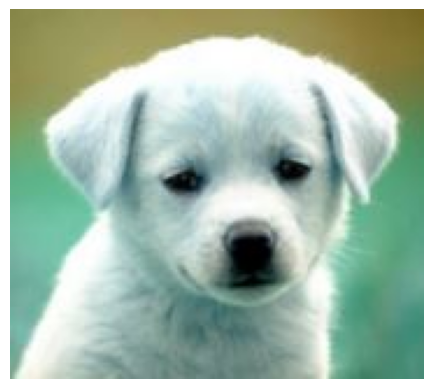

In [91]:
# Convert the image from BGR to RGB format for displaying correctly with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off') # Hide the axis
plt.show()

# Convert RGB to BGR then Grayscale

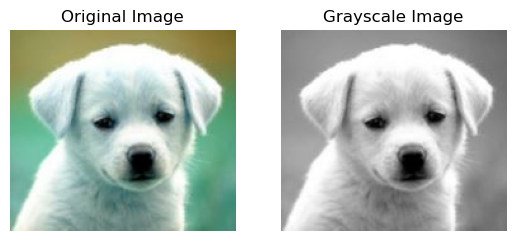

In [92]:
# Convert the image from BGR to RGB then grayscale format for displaying correctly with matplotlib
gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

# Display the original and grayscale images side by side
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')  # Hide the axis

plt.subplot(1, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')  # Hide the axis

plt.show()

# Gray scale  image matrix

In [93]:
# Print the grayscale matrix form
print("Grayscale Matrix Form:\n", gray_image)

Grayscale Matrix Form:
 [[127 127 128 ...  99  99  99]
 [127 127 128 ... 100  99  99]
 [127 128 128 ... 100 100 100]
 ...
 [149 166 193 ... 119 116 116]
 [151 174 206 ... 119 116 116]
 [155 179 212 ... 119 116 116]]


# Gray to BGR

In [94]:
# Convert the grayscale image to BGR
bgr_image = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

# Save the converted image
cv2.imwrite('BGR.jpg', bgr_image)


True

# Binary Image with matrix

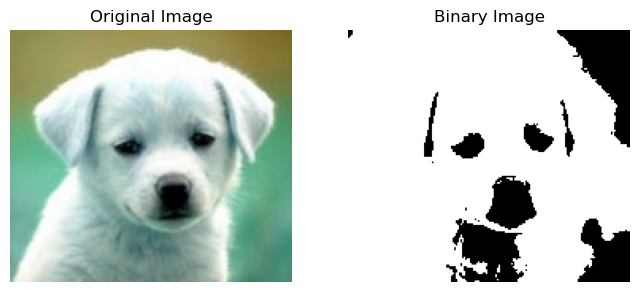

In [95]:
# Apply a binary threshold to the grayscale image
_, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Display the original and binary images side by side
plt.figure(figsize=(8, 4))

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')  # Hide the axis

# Display the binary image
plt.subplot(1, 2, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')  # Hide the axis

plt.show()

# binary image matrix

In [96]:
# Print the binary image matrix
print("Binary Image Matrix:\n", binary_image)

Binary Image Matrix:
 [[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


# Splitting and Merging channels

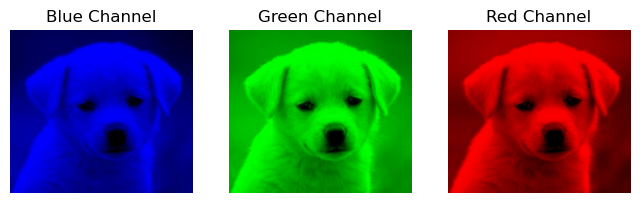

In [97]:
# Split the image into B, G, R channels
B, G, R = cv2.split(image)

# Create an empty array with the same shape as the original image
zeros = np.zeros_like(B)

# Merge the channels with zeros arrays to visualize each channel separately
Red_image = cv2.merge([zeros, zeros, R])
Green_image = cv2.merge([zeros, G, zeros])
Blue_image = cv2.merge([B, zeros, zeros])

# Display the images
fig, axes = plt.subplots(1, 3, figsize=(8, 4))
axes[0].imshow(cv2.cvtColor(Blue_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Blue Channel')
axes[0].axis('off')

axes[1].imshow(cv2.cvtColor(Green_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Green Channel')
axes[1].axis('off')

axes[2].imshow(cv2.cvtColor(Red_image, cv2.COLOR_BGR2RGB))
axes[2].set_title('Red Channel')
axes[2].axis('off')

plt.show()


# Histogram 

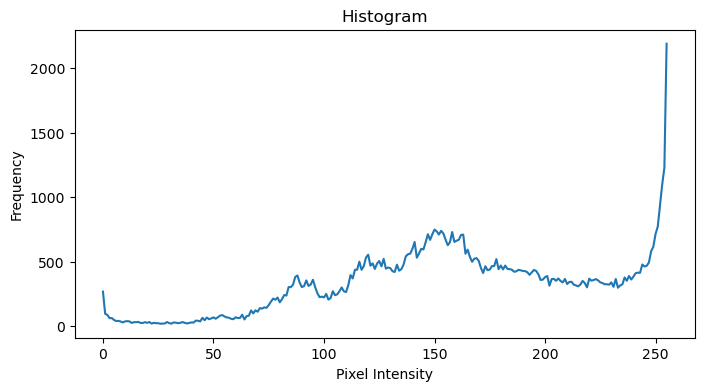

In [98]:
# Flatten the image into a 1D array
flat_img = image.ravel()

# Calculate the histogram
hist, bins = np.histogram(flat_img, bins=256, range=(0, 256))

# Plot the histogram
plt.figure(figsize=(8, 4))
plt.plot(bins[:-1], hist)  # bins[:-1] to match the size of hist
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()

# Color Histogram using matplot

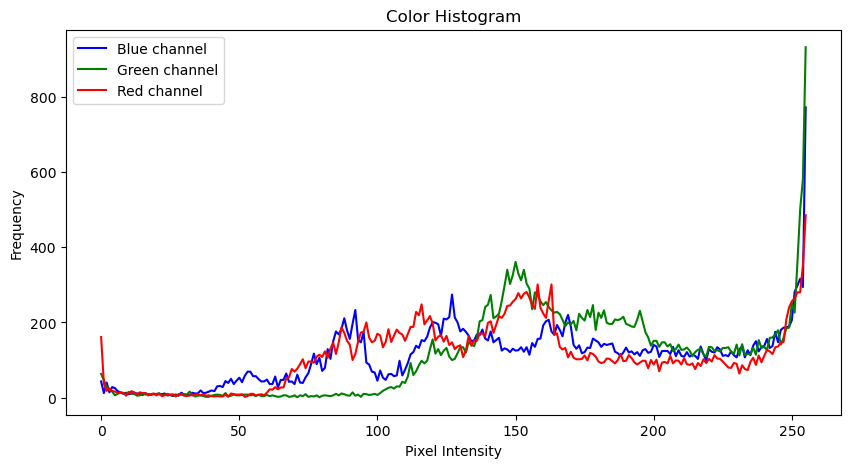

In [99]:
# Calculate the histogram for each channel
hist_b = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([image], [2], None, [256], [0, 256])

# Plot the histograms
plt.figure(figsize=(10, 5))
plt.plot(hist_b, color='blue', label='Blue channel')
plt.plot(hist_g, color='green', label='Green channel')
plt.plot(hist_r, color='red', label='Red channel')
plt.title('Color Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Histgram Equalisation of Grayscale Image

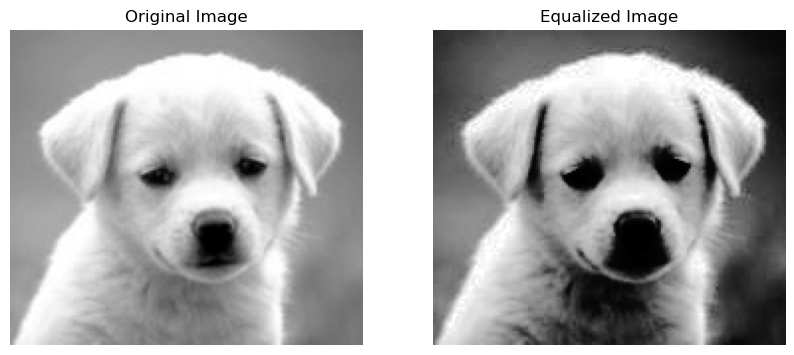

In [100]:
# Load the image
image = cv2.imread('source.jpg', 0)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('Equalized Image')
plt.imshow(equalized_image, cmap='gray')
plt.axis('off')
plt.show()

# Equalized image matrix

In [101]:
# Print the Equalized image matrix
print("Equalized Image Matrix:\n", equalized_image)

Equalized Image Matrix:
 [[ 43  43  45 ...   8   8   8]
 [ 43  43  45 ...   8   8   8]
 [ 43  45  45 ...   8   8   8]
 ...
 [103 137 171 ...  30  24  24]
 [108 150 185 ...  30  24  24]
 [117 155 191 ...  30  24  24]]


# Histogram matching

No of Channel of Source Image is: 3
No of Channel of Reference Image is: 3


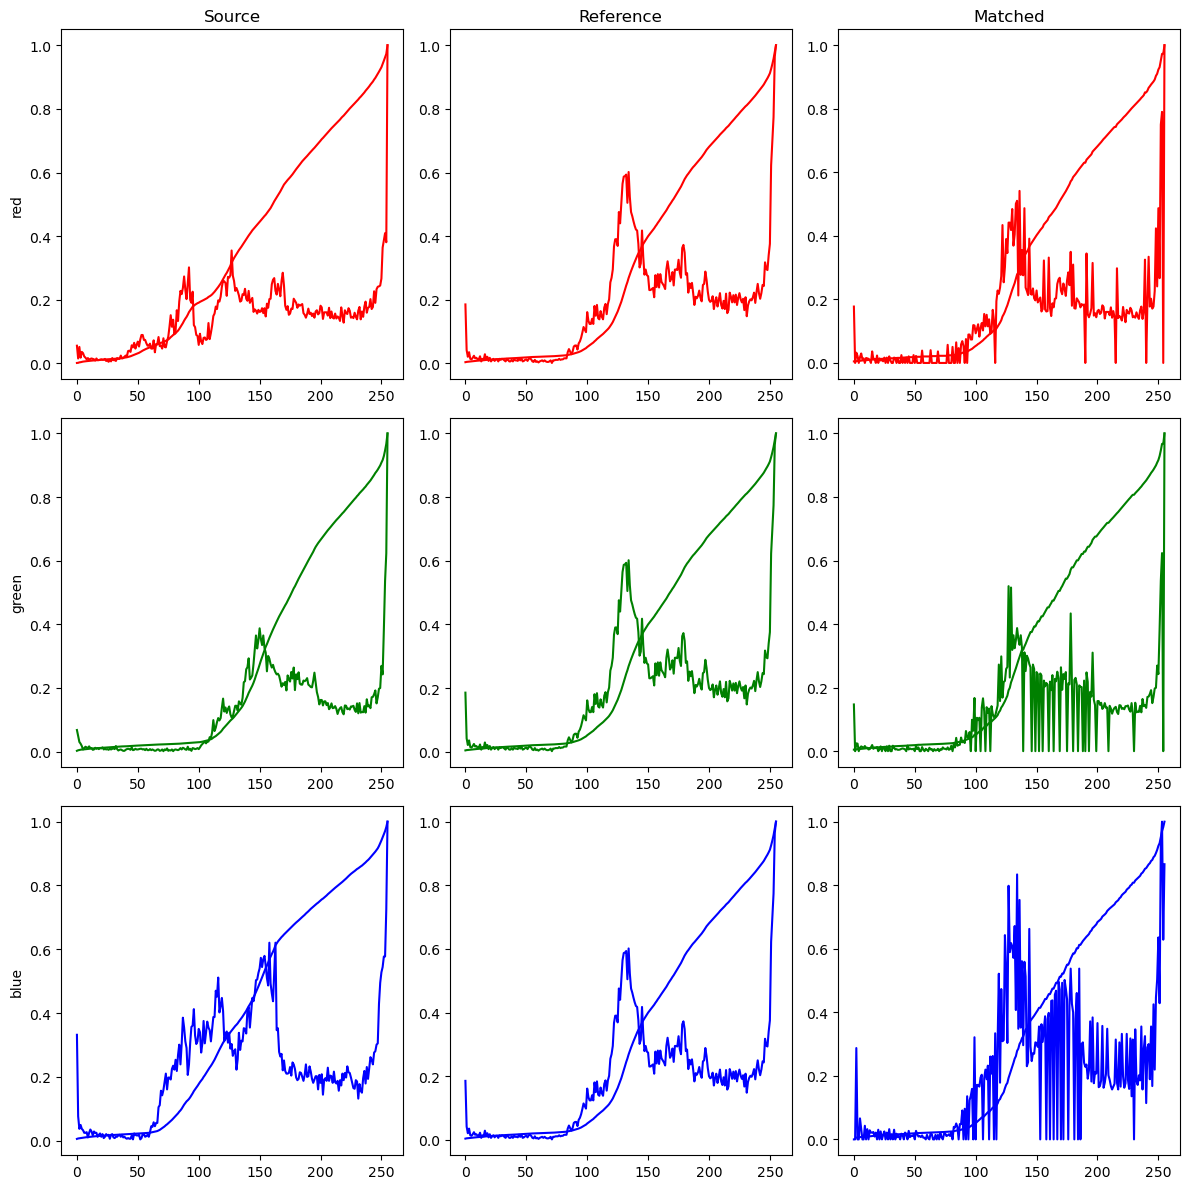

In [102]:
# Read the main image
img1 = cv2.imread("source.jpg")

# Checking the number of channels
print('No of Channel of Source Image is: ' + str(img1.ndim))

# Read the reference image
img2 = cv2.imread("reference.jpg")

# Checking the number of channels
print('No of Channel of Reference Image is: ' + str(img2.ndim))

image = img1
reference = img2

# Match histograms
matched = match_histograms(image, reference, channel_axis=-1)

# Plot the images
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)

for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Source')
ax2.imshow(cv2.cvtColor(reference, cv2.COLOR_BGR2RGB))
ax2.set_title('Reference')
ax3.imshow(cv2.cvtColor(matched, cv2.COLOR_BGR2RGB))
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

# Plot histograms
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max(), color=c_color)
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf, color=c_color)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')
plt.tight_layout()
plt.show()


# CLAHE

In [103]:
import cv2
import argparse
import numpy as np
from matplotlib import pyplot as plt

def apply_clahe(image_path, clip_limit=2.0, tile_grid_size=(8, 8)):
    # Load the image
    image = cv2.imread('source.jpg', 0)  # Read the image in grayscale
    
    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    clahe_image = clahe.apply(image)
    
    # Display the original and CLAHE images side by side
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(clahe_image, cmap='gray')
    plt.title('CLAHE Image')
    plt.axis('off')
    
    plt.show()

parser = argparse.ArgumentParser(description='Apply CLAHE to an image.')
parser.add_argument('image_path', type=str, help='Path to the input image')
parser.add_argument('--clip_limit', type=float, default=2.0, help='CLAHE clip limit')
parser.add_argument('--tile_grid_size', type=int, nargs=2, default=(8, 8), help='CLAHE tile grid size')    
args, unknown = parser.parse_known_args()
apply_clahe(args.image_path, args.clip_limit, tuple(args.tile_grid_size))




# Sampling and Quantization

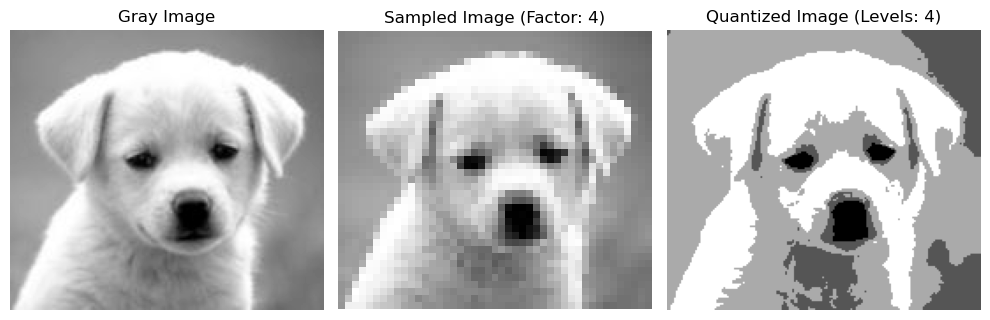

In [104]:
def sampling(image, sampling_factor):
    # Reduce the resolution of the image by selecting every nth pixel
    sampled_image = image[::sampling_factor, ::sampling_factor]
    return sampled_image

def quantization(image, levels):
    # Divide the range 0-255 into equal bins and assign each pixel to the nearest bin
    bins = np.linspace(0, 256, levels+1)
    quantized_image = np.digitize(image, bins) - 1
    quantized_image = bins[quantized_image].astype('uint8')
    return quantized_image

# Load the image
image = cv2.imread('source.jpg', cv2.IMREAD_GRAYSCALE)

# Parameters
sampling_factor = 4  # Reduce resolution by a factor of 4
quantization_levels = 4  # Quantize to 4 levels

# Perform sampling
sampled_image = sampling(image, sampling_factor)

# Perform quantization
quantized_image = quantization(image, quantization_levels)

# Display the original, sampled, and quantized images
plt.figure(figsize=(10,5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

# Sampled image
plt.subplot(1, 3, 2)
plt.imshow(sampled_image, cmap='gray')
plt.title(f'Sampled Image (Factor: {sampling_factor})')
plt.axis('off')

# Quantized image
plt.subplot(1, 3, 3)
plt.imshow(quantized_image, cmap='gray')
plt.title(f'Quantized Image (Levels: {quantization_levels})')
plt.axis('off')

plt.tight_layout()
plt.show()


# Print the sampled image matrix and quantized image matrix

In [105]:
# Print the sampled image matrix
print("Sampled Image Matrix:\n", sampled_image)

# Print the quantized image matrix
print("Quantized Image Matrix:\n", quantized_image)

Sampled Image Matrix:
 [[127 130 132 ... 104 101  99]
 [128 130 131 ... 108 104 101]
 [130 132 135 ... 109 107 105]
 ...
 [149 167 255 ... 115 121 118]
 [152 196 251 ... 115 123 118]
 [149 240 241 ... 116 120 116]]
Quantized Image Matrix:
 [[ 64  64 128 ...  64  64  64]
 [ 64  64 128 ...  64  64  64]
 [ 64 128 128 ...  64  64  64]
 ...
 [128 128 192 ...  64  64  64]
 [128 128 192 ...  64  64  64]
 [128 128 192 ...  64  64  64]]


# HOG

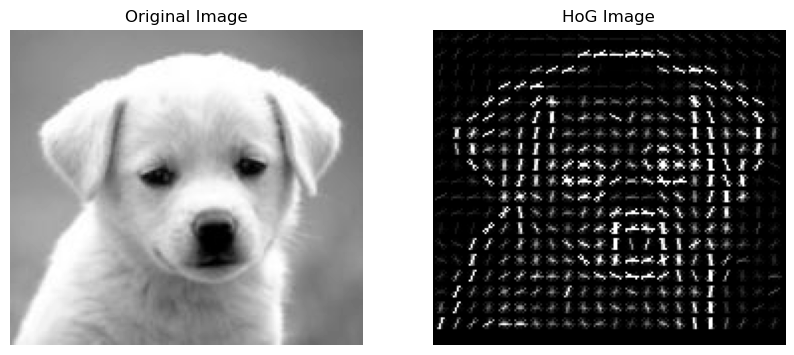

In [106]:
# Load the image
image = cv2.imread('source.jpg', cv2.IMREAD_GRAYSCALE)

# Compute HoG features
features, hog_image = hog(image, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True,
                          block_norm='L2-Hys')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('HoG Image')
plt.imshow(hog_image_rescaled, cmap='gray')
plt.axis('off')
plt.show()


# LBP

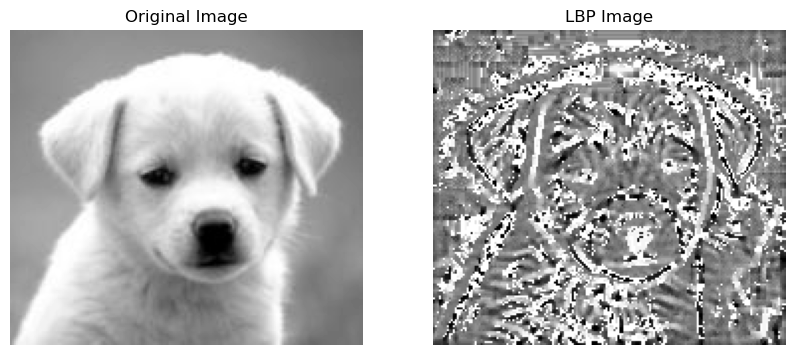

In [107]:
# Parameters for LBP
radius = 3
n_points = 8 * radius

# Load the image
image = cv2.imread('source.jpg', cv2.IMREAD_GRAYSCALE)

# Compute LBP
lbp = local_binary_pattern(image, n_points, radius, method='uniform')

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title('LBP Image')
plt.imshow(lbp, cmap='gray')
plt.axis('off')
plt.show()


# Negative Image

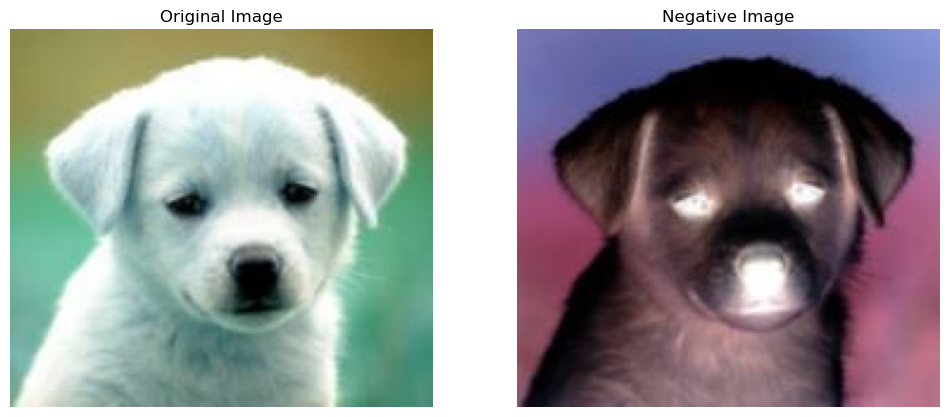

In [108]:
def create_negative_image(image):
    
    return 255 - image

# Load the original image
input_image_path = 'source.jpg'
image = cv2.imread(input_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for display purposes

# Create the negative image
negative_image = create_negative_image(image)

# Display the original and negative images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Negative Image")
plt.imshow(negative_image)
plt.axis('off')

plt.show()

# Gray level Transformation(Linear , Logarithm , Power law )

C:\Users\FAST\AppData\Local\Temp\ipykernel_13424\3055570854.py:12: RuntimeWarning: divide by zero encountered in log
  transformed_image = c * (np.log(1 + image))
C:\Users\FAST\AppData\Local\Temp\ipykernel_13424\3055570854.py:13: RuntimeWarning: invalid value encountered in cast
  return np.uint8(transformed_image)


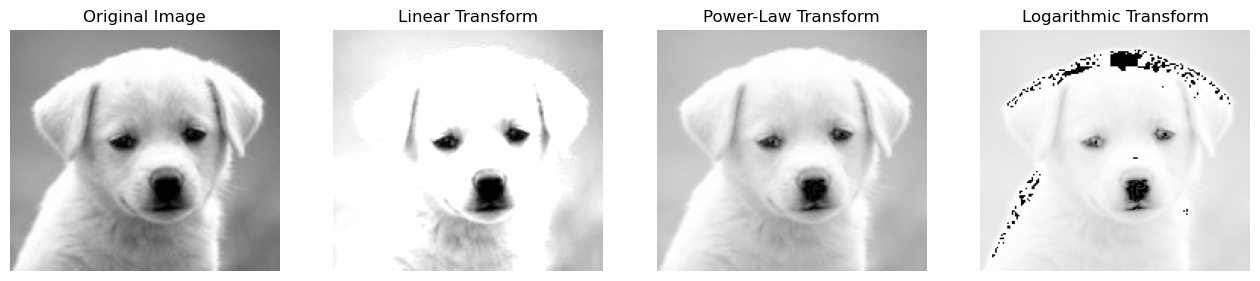

In [109]:
def linear_transform(image, alpha=1.0, beta=0):
   
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def power_law_transform(image, gamma=1.0):
    normalized_image = image / 255.0
    transformed_image = cv2.pow(normalized_image, gamma)
    return np.uint8(transformed_image * 255)

def logarithmic_transform(image):
    c = 255 / np.log(1 + np.max(image))
    transformed_image = c * (np.log(1 + image))
    return np.uint8(transformed_image)

# Load the original grayscale image
input_image_path = 'source.jpg'
gray_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Apply transformations
linear_image = linear_transform(gray_image, alpha=1.5, beta=20)
power_law_image = power_law_transform(gray_image, gamma=0.5)
logarithmic_image = logarithmic_transform(gray_image)

# Display the original and transformed images
plt.figure(figsize=(16, 8))

plt.subplot(1, 4, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title("Linear Transform")
plt.imshow(linear_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title("Power-Law Transform")
plt.imshow(power_law_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title("Logarithmic Transform")
plt.imshow(logarithmic_image, cmap='gray')
plt.axis('off')

plt.show()

# Piecewise Linear Transform

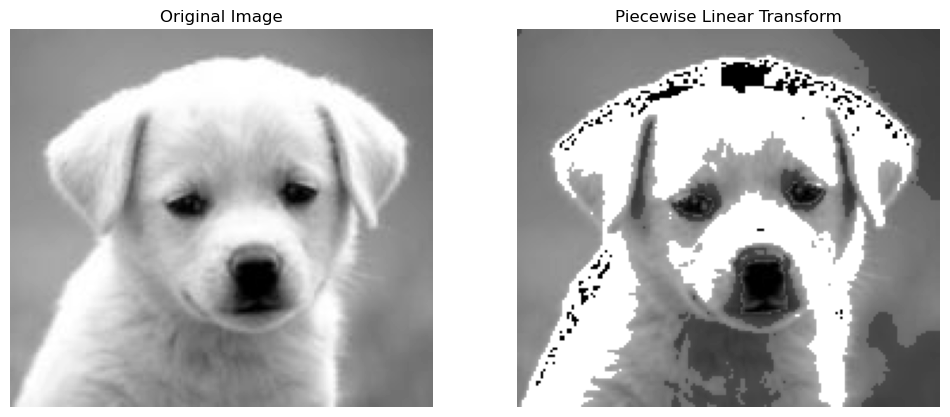

In [110]:
def piecewise_linear_transform(image, breakpoints, slopes, intercepts):
    # Ensure breakpoints, slopes, and intercepts have appropriate lengths
    assert len(breakpoints) == len(slopes) + 1
    assert len(breakpoints) - 1 == len(intercepts)

    # Create an empty image for the transformed result
    transformed_image = np.zeros_like(image, dtype=np.float32)

    # Iterate over each segment
    for i in range(len(breakpoints) - 1):
        lower_bound = breakpoints[i]
        upper_bound = breakpoints[i + 1]
        slope = slopes[i]
        intercept = intercepts[i]

        # Mask for current segment
        mask = (image >= lower_bound) & (image < upper_bound)

        # Apply the linear transformation
        transformed_image[mask] = slope * image[mask] + intercept

    # Clip values to be in valid range [0, 255] and convert to uint8
    transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)
    
    return transformed_image

# Load the original grayscale image
input_image_path = 'source.jpg'
gray_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Define breakpoints, slopes, and intercepts for the piecewise linear transformation
breakpoints = [0, 64, 128, 192, 255]
slopes = [1.5, 0.5, 1.0, 2.0]
intercepts = [0, 10, -20, 30]

# Apply piecewise linear transformation
piecewise_image = piecewise_linear_transform(gray_image, breakpoints, slopes, intercepts)

# Display the original and piecewise linear transformed images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Piecewise Linear Transform")
plt.imshow(piecewise_image, cmap='gray')
plt.axis('off')

plt.show()


# Gray Level Slicing

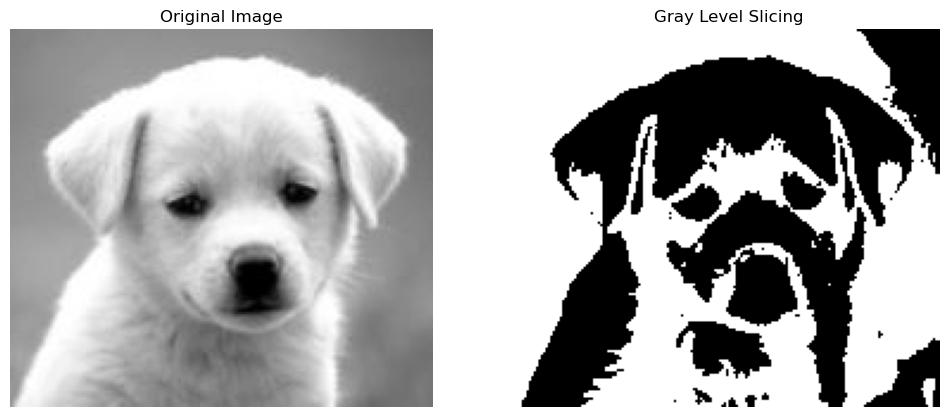

In [111]:
def gray_level_slicing(image, lower_bound, upper_bound, value=255):
    sliced_image = np.zeros_like(image, dtype=np.uint8)
    mask = (image >= lower_bound) & (image <= upper_bound)
    sliced_image[mask] = value
    return sliced_image

# Load the original grayscale image
input_image_path = 'source.jpg'
gray_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Define the range for gray level slicing
lower_bound = 120
upper_bound = 190
highlight_value = 255

# Apply gray level slicing
sliced_image = gray_level_slicing(gray_image, lower_bound, upper_bound, highlight_value)

# Display the original and sliced images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Gray Level Slicing")
plt.imshow(sliced_image, cmap='gray')
plt.axis('off')

plt.show()


# Bit Plane Slicing

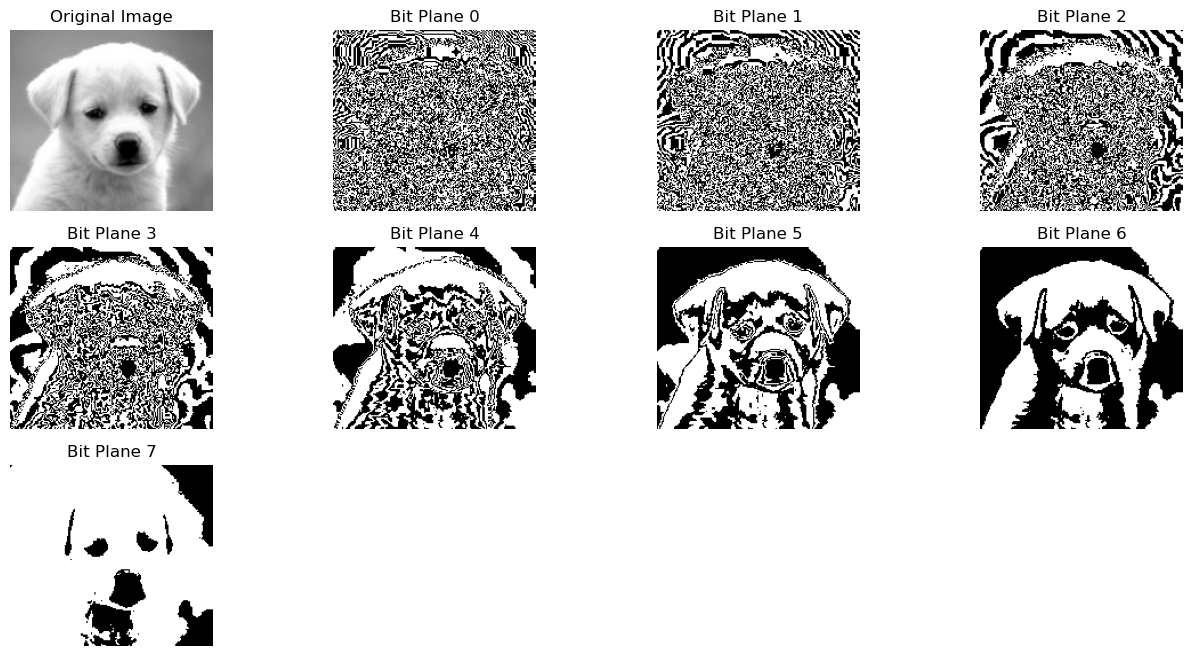

In [112]:
def bit_plane_slicing(image):
    bit_planes = []
    for i in range(8):
        # Create a mask for the ith bit plane
        mask = 1 << i
        # Extract the ith bit plane
        bit_plane = (image & mask) >> i
        # Scale the bit plane to 0-255 range for display
        bit_plane = bit_plane * 255
        bit_planes.append(bit_plane.astype(np.uint8))
    return bit_planes

# Load the original grayscale image
input_image_path = 'source.jpg'
gray_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Extract bit planes
bit_planes = bit_plane_slicing(gray_image)

# Display the original image and bit planes
plt.figure(figsize=(16, 8))

plt.subplot(3, 4, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

for i in range(8):
    plt.subplot(3, 4, i + 2)
    plt.title(f"Bit Plane {i}")
    plt.imshow(bit_planes[i], cmap='gray')
    plt.axis('off')

plt.show()


# Padded Image

In [113]:
def pad_image(image, top=10, bottom=10, left=10, right=10, border_type=cv2.BORDER_CONSTANT, value=0):
    # Apply padding to the image
    padded_image = cv2.copyMakeBorder(
        image, top, bottom, left, right, border_type, value=value
    )
    return padded_image

# Load the original grayscale image
input_image_path = 'source.jpg'
gray_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Pad the image
padded_image = pad_image(gray_image, top=20, bottom=20, left=20, right=20, border_type=cv2.BORDER_CONSTANT, value=255)

# Display the original and padded images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Padded Image")
plt.imshow(padded_image, cmap='gray')
plt.axis('off')

plt.show()


# Transformations

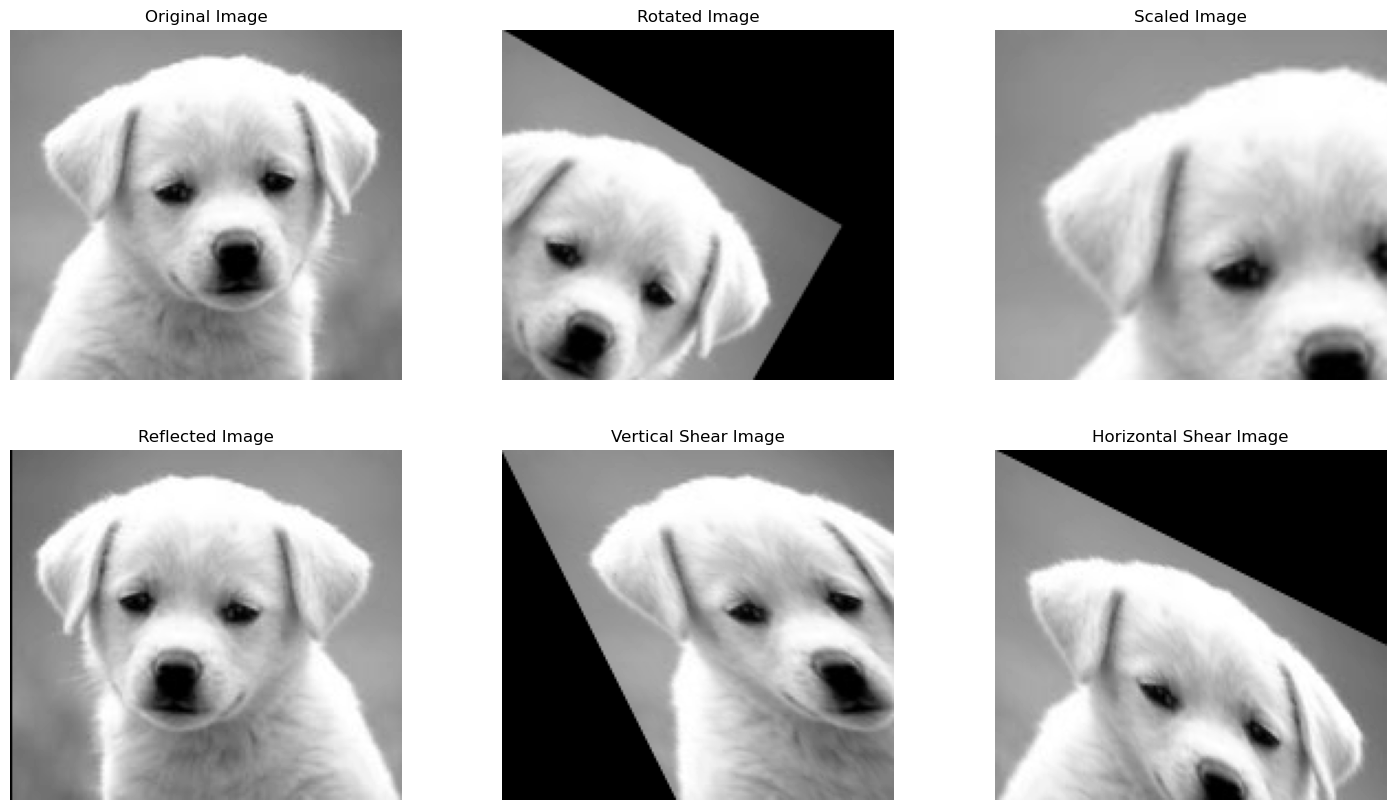

In [115]:
# Load image
image_path = 'source.jpg'  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale

# Get image dimensions
rows, cols = image.shape

# Function to apply affine transformation
def apply_affine_transform(matrix, img_array):
    rows, cols = img_array.shape
    transformed_img_array = cv2.warpAffine(img_array, matrix, (cols, rows))
    return transformed_img_array

# Rotation
theta = np.radians(30)  # Rotation angle in radians
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0]
], dtype=np.float32)

rotated_image = apply_affine_transform(rotation_matrix, image)

# Scaling
sx, sy = 1.5, 1.5  # Scaling factors
scaling_matrix = np.array([
    [sx, 0, 0],
    [0, sy, 0]
], dtype=np.float32)

scaled_image = apply_affine_transform(scaling_matrix, image)

# Reflection
reflection_matrix = np.array([
    [-1, 0, cols],
    [0, 1, 0]
], dtype=np.float32)

reflected_image = apply_affine_transform(reflection_matrix, image)

# Shear (Vertical)
shear_vertical_matrix = np.array([
    [1, 0.5, 0],
    [0, 1, 0]
], dtype=np.float32)

shear_vertical_image = apply_affine_transform(shear_vertical_matrix, image)

# Shear (Horizontal)
shear_horizontal_matrix = np.array([
    [1, 0, 0],
    [0.5, 1, 0]
], dtype=np.float32)

shear_horizontal_image = apply_affine_transform(shear_horizontal_matrix, image)

# Display images
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Rotated Image')
plt.imshow(rotated_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Scaled Image')
plt.imshow(scaled_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Reflected Image')
plt.imshow(reflected_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Vertical Shear Image')
plt.imshow(shear_vertical_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Horizontal Shear Image')
plt.imshow(shear_horizontal_image, cmap='gray')
plt.axis('off')

plt.show()


# Smoothing Filter

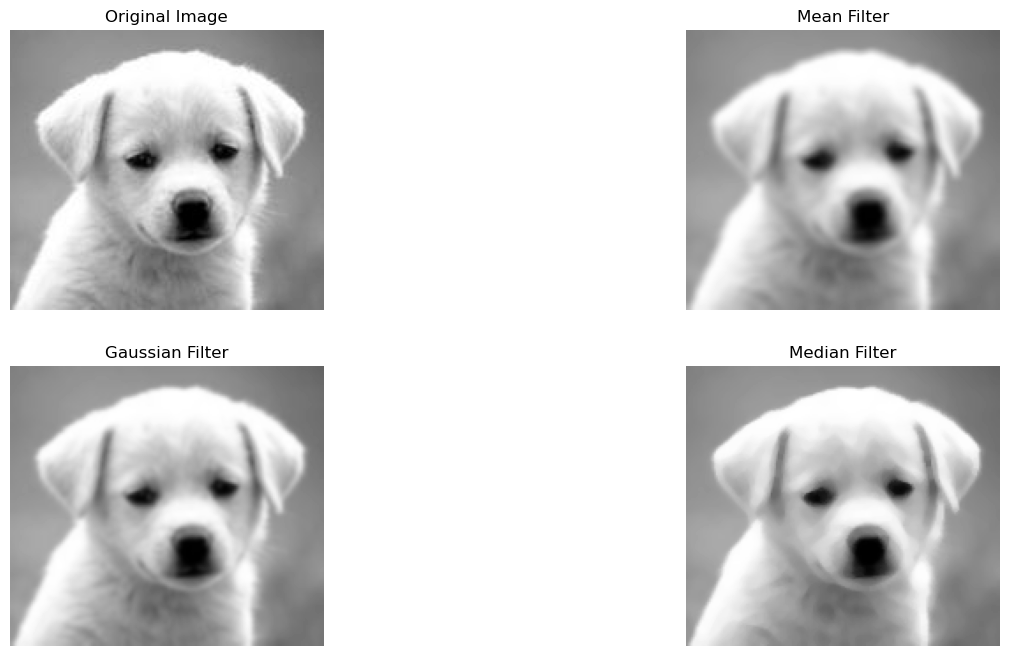

In [116]:
def apply_mean_filter(image, kernel_size=5):
    return cv2.blur(image, (kernel_size, kernel_size))

def apply_gaussian_filter(image, kernel_size=5, sigma=1.0):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

def apply_median_filter(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)

# Load the original grayscale image
input_image_path = 'source.jpg'
gray_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Apply filters
mean_filtered_image = apply_mean_filter(gray_image, kernel_size=5)
gaussian_filtered_image = apply_gaussian_filter(gray_image, kernel_size=5, sigma=1.0)
median_filtered_image = apply_median_filter(gray_image, kernel_size=5)

# Display the original and filtered images
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Mean Filter")
plt.imshow(mean_filtered_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Gaussian Filter")
plt.imshow(gaussian_filtered_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Median Filter")
plt.imshow(median_filtered_image, cmap='gray')
plt.axis('off')

plt.show()


# Weighted Filter

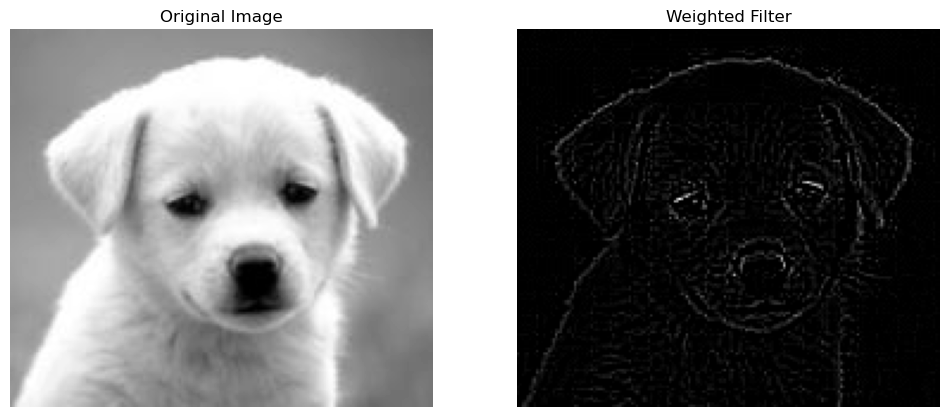

In [117]:
def apply_weighted_filter(image, kernel):
    # Apply the weighted filter using filter2D
    return cv2.filter2D(image, -1, kernel)

# Load the original grayscale image
input_image_path = 'source.jpg'
gray_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Define a weighted kernel
# Example: a simple kernel with weights
weighted_kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

# Apply the weighted filter
weighted_filtered_image = apply_weighted_filter(gray_image, weighted_kernel)

# Display the original and filtered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Weighted Filter")
plt.imshow(weighted_filtered_image, cmap='gray')
plt.axis('off')

plt.show()


# Convolotion & Corelation

In [118]:
def apply_filter(image, kernel):
    # Apply filter using filter2D (both correlation and convolution)
    return cv2.filter2D(image, -1, kernel)

# Load the original grayscale image
input_image_path = 'source.jpg'
gray_image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

# Define a sample kernel
# Example: a simple edge detection kernel
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Apply correlation (same as convolution in OpenCV)
correlation_image = apply_filter(gray_image, kernel)

# Apply convolution (same as correlation in OpenCV)
convolution_image = apply_filter(gray_image, kernel)

# Display the original, correlation, and convolution images
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Correlation Image")
plt.imshow(correlation_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Convolution Image")
plt.imshow(convolution_image, cmap='gray')
plt.axis('off')

plt.show()


# Filters 

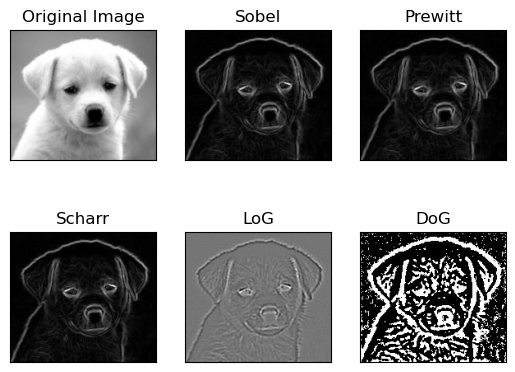

In [119]:
# Sobel Operator
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobelx, sobely)

# Prewitt Operator
# Prewitt kernels
prewitt_kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float64)
prewitt_kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float64)
prewittx = cv2.filter2D(image, cv2.CV_64F, prewitt_kernelx)
prewitty = cv2.filter2D(image, cv2.CV_64F, prewitt_kernely)
prewitt = cv2.magnitude(prewittx, prewitty)

# Scharr Operator
scharrx = cv2.Scharr(image, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(image, cv2.CV_64F, 0, 1)
scharr = cv2.magnitude(scharrx, scharry)

# Laplacian of Gaussian (LoG)
blurred = cv2.GaussianBlur(image, (3, 3), 0)
log = cv2.Laplacian(blurred, cv2.CV_64F)

# Difference of Gaussians (DoG)
gaussian1 = cv2.GaussianBlur(image, (5, 5), 0)
gaussian2 = cv2.GaussianBlur(image, (9, 9), 0)
dog = gaussian1 - gaussian2

# Display the results
titles = ['Original Image', 'Sobel', 'Prewitt', 'Scharr', 'LoG', 'DoG']
images = [image, sobel, prewitt, scharr, log, dog]

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


# Frequency Domain Filtering

In [120]:
def display_image(title, image, cmap='gray'):
    plt.imshow(image, cmap=cmap)
    plt.title(title)
    plt.axis('off')

def apply_frequency_filter(image, filter_type='lowpass', cutoff=30):
    # Perform the 2D Fourier Transform
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)  # Shift the zero frequency component to the center of the spectrum

    # Create a mask with the same dimensions as the image
    rows, cols = image.shape
    crow, ccol = rows // 2 , cols // 2  # center

    mask = np.zeros((rows, cols), np.uint8)

    if filter_type == 'lowpass':
        mask[crow-cutoff:crow+cutoff, ccol-cutoff:ccol+cutoff] = 1
    elif filter_type == 'highpass':
        mask[:,:] = 1
        mask[crow-cutoff:crow+cutoff, ccol-cutoff:ccol+cutoff] = 0

    # Apply the mask to the frequency domain representation
    fshift_filtered = fshift * mask

    # Perform the inverse shift and inverse Fourier Transform
    f_ishift = np.fft.ifftshift(fshift_filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return img_back


    # Read the image in grayscale
    
image = cv2.imread('source.jpg', cv2.IMREAD_GRAYSCALE)

    # Apply low-pass and high-pass filters
lowpass_filtered = apply_frequency_filter(image, filter_type='lowpass', cutoff=30)
highpass_filtered = apply_frequency_filter(image, filter_type='highpass', cutoff=30)

    # Create a figure to display the results
plt.figure(figsize=(12, 8))

    # Display the original image
plt.subplot(2, 2, 1)
display_image('Original Image', image)

    # Display the magnitude spectrum
f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(np.abs(fshift))
plt.subplot(2, 2, 2)
display_image('Magnitude Spectrum', magnitude_spectrum)

    # Display the low-pass filtered image
plt.subplot(2, 2, 3)
display_image('Low-pass Filtered Image', lowpass_filtered)

    # Display the high-pass filtered image
plt.subplot(2, 2, 4)
display_image('High-pass Filtered Image', highpass_filtered)

    # Show the plots
plt.tight_layout()
plt.show()


# Morphological Operations

In [121]:
def plot_images(titles, images, cmap='gray'):
    n = len(images)
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

def main(input_image):
    # Load the image in grayscale
    image = cv2.imread(input_image, cv2.IMREAD_GRAYSCALE)

    # Define the kernel (structuring element)
    kernel = np.ones((5, 5), np.uint8)

    # Erosion
    erosion = cv2.erode(image, kernel, iterations=1)

    # Dilation
    dilation = cv2.dilate(image, kernel, iterations=1)

    # Opening
    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    # Closing
    closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

    # Morphological Gradient
    gradient = cv2.morphologyEx(image, cv2.MORPH_GRADIENT, kernel)

    # Plot the results
    titles = ['Original Image', 'Erosion', 'Dilation', 'Opening', 'Closing', 'Gradient']
    images = [image, erosion, dilation, opening, closing, gradient]
    plot_images(titles, images)

if __name__ == "__main__":
    import argparse
    import sys
    import os
    
    # Check if the script is run in an interactive environment (like Jupyter)
    if 'ipykernel' in sys.modules or 'JPY_PARENT_PID' in os.environ:
        input_image = 'source.jpg'  # Default image for Jupyter Notebook
        main(input_image)
    else:
        parser = argparse.ArgumentParser(description='Perform morphological operations on an image.')
        parser.add_argument('input_image', type=str, help='Path to the input image')
        args = parser.parse_args()
        main(args.input_image)


# Image Segmentation

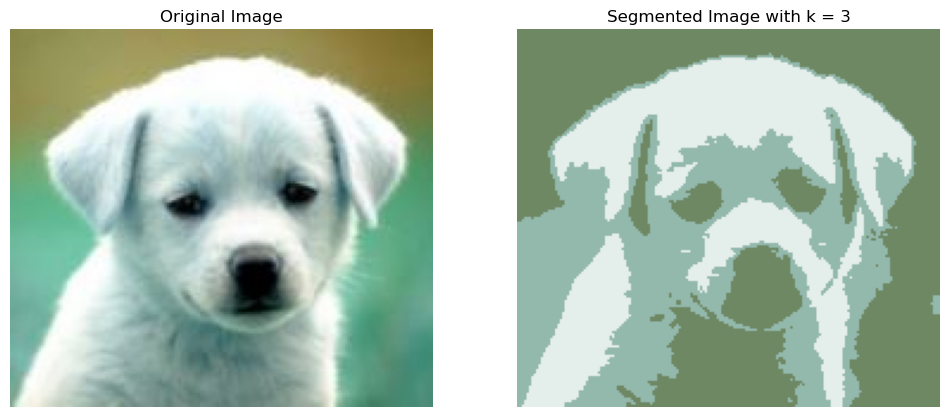

In [122]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'source.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Reshape the image to be a list of pixels
pixels = image.reshape(-1, 3)

# Convert to float type for k-means
pixels = np.float32(pixels)

# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3  # Number of clusters
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8 bit values
centers = np.uint8(centers)

# Map the labels to the centers
segmented_image = centers[labels.flatten()]

# Reshape back to the original image shape
segmented_image = segmented_image.reshape(image.shape)

# Display the original and segmented images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image with k = {}'.format(k))
plt.imshow(segmented_image)
plt.axis('off')

plt.show()
